@Misc{,
    author = {Fernando Nogueira},
    title = {{Bayesian Optimization}: Open source constrained global optimization tool for {Python}},
    year = {2014--},
    url = " https://github.com/fmfn/BayesianOptimization"
}

### pip install bayesian-optimization (in terminal)

In [138]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

In [139]:
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events

### Specifying the function to be optimized:

In [140]:
xmin = -100
xmax = 100
ymin = -100
ymax = 100

#Change the function to be optimized here 

def func(x, y):
    return np.sin(x**2) + 3*y


#def objective(trial):
#    noise = 5*(np.random.rand(1) - 0.5)
#    x = trial.suggest_float("x", xmin, xmax)
#    y = trial.suggest_float("y", ymin, ymax)
#    return -(func(x,y) + noise)


### Plot the objective function:

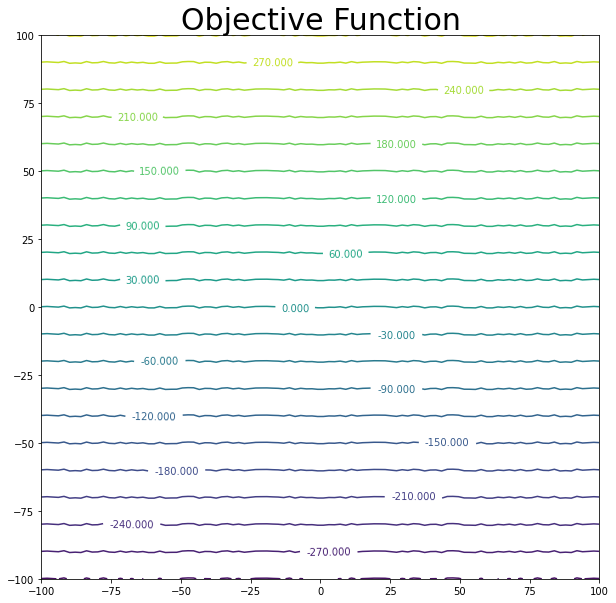

In [141]:
x = np.linspace(xmin,xmax,100)
y = np.linspace(ymin,ymax,100)
xx, yy = np.meshgrid(x,y)
z = func(xx,yy)
fig, ax = plt.subplots(figsize=(10,10))
cs = ax.contour(z, extent=(xmin,xmax,ymin,ymax), levels = 20)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title('Objective Function', fontsize = 30)
plt.show()

1. Import the "BayesianOptimization" object.
2. Specify a function to be optimized, f. 
3. Specify its parameters with their corresponding bounds, pbounds. (This is a constrained optimization technique, so you must specify the minimum and maximum values that can be probed for each parameter in order for it to work.)

In [173]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'x': (xmin, xmax), 'y': (ymin, ymax)}

optimizer = BayesianOptimization(f=func, pbounds=pbounds, random_state=1, verbose=3) 

In [174]:
optimizer

Parameters to maximized:

<strong>n_iter</strong>: Specifies the number of steps of the Bayesian optimization to perform. Iterating over more steps will increase the liklihood of finding the maximum.

<strong>init_points</strong>: Specifies the number of steps of random exploration to perform. Random exploration can help by diversifying the exploration space.

In [175]:
optimizer.maximize(
    init_points=10,
    n_iter=10,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  131.3    | -16.6     |  44.06    |
|  2        | -119.5    | -99.98    | -39.53    |
|  3        | -243.9    | -70.65    | -81.53    |
|  4        | -93.44    | -62.75    | -30.89    |
|  5        |  22.46    | -20.65    |  7.763    |
|  6        |  110.7    | -16.16    |  37.04    |
|  7        |  227.3    | -59.11    |  75.62    |
|  8        |  102.1    | -94.52    |  34.09    |
|  9        |  34.99    | -16.54    |  11.74    |
|  10       | -180.2    | -71.92    | -60.38    |
|  11       |  299.7    |  100.0    |  100.0    |
|  12       |  299.0    |  51.6     |  100.0    |
|  13       |  298.0    |  50.31    |  99.64    |
|  14       |  299.7    | -100.0    |  100.0    |
|  15       |  300.4    | -39.95    |  100.0    |
|  16       |  298.4    | -72.42    |  99.75    |
|  17       |  299.4    |  11.65    |  99.98    |
|  18       |  300.6    | -17.92    |  99.95    |


In [176]:
from bayes_opt.util import load_logs

new_optimizer = BayesianOptimization(
    f=func,
    pbounds={"x": (xmin, xmax), "y": (ymin, ymax)},
    verbose=2,
    random_state=7,
)

# New optimizer is loaded with previously seen points
load_logs(new_optimizer, logs=["./logs.json"])

In [177]:
print("New optimizer is now aware of {} points.".format(len(new_optimizer.space)))

New optimizer is now aware of 150 points.


In [178]:
new_optimizer.maximize(
    init_points=0,
    n_iter=10,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  298.5    |  8.188    |  99.8     |
|  2        |  300.8    | -99.99    |  99.94    |
|  3        |  299.9    |  97.74    |  99.89    |
|  4        |  299.0    |  2.219    |  99.99    |
|  5        |  300.2    |  91.45    |  100.0    |
|  6        |  299.7    | -100.0    |  100.0    |
|  7        | -234.9    | -99.93    | -78.64    |
|  8        |  299.7    | -100.0    |  100.0    |
|  9        |  299.0    | -13.88    |  99.96    |
|  10       | -33.66    | -100.0    | -11.12    |


In [179]:
new_optimizer.max

{'target': 300.9806196994327,
 'params': {'x': -6.741608700137249, 'y': 99.99533422185604}}

The property <strong>optimizer.res</strong> returns the list of all parameters probed and their corresponding target values.

In [180]:
best_params = optimizer.max["params"]

found_x = best_params['x']
found_y = best_params['y']

print("Found x: {}, f: {}".format(found_x, (func(found_x, found_y))))
print("Found y: {}, f: {}".format(found_y, (func(found_x, found_y))))

Found x: -14.454852591067223, f: 300.73101039043456
Found y: 99.91045696093533, f: 300.73101039043456


The property <strong>optimizer.max</strong> returns the best combination of parameters and target value found.

## Monte Carlo Simulation to Test the Performance of the Optimizer

This will measure the performance of the optimizer on a specific function. The number of trials and the number of iterations can be varied. 

In [181]:
x = []
y = []
z = []

#pbounds = {'x': (-100, 100), 'y': (-100, 100)}

for i in range(2):
    
    optimizer = BayesianOptimization(f=func, pbounds=pbounds, random_state=0, verbose=2)
    optimizer.maximize(init_points=5, n_iter=10)
    # End iteration code;
    
    # "best_params" is a variable to save the x and y values for the optimized solution, similar to optimize.max:
    best_params = optimizer.max["params"]
    found_x = best_params['x']
    found_y = best_params['y']
    print("Found x: {}, f: {}".format(found_x, (func(found_x, found_y))))
    print("Found y: {}, f: {}".format(found_y, (func(found_x, found_y))))
    x.append(found_x)
    y.append(found_y)
    z.append(func(found_x, found_y))
    if i%10 == 0:
        print(i)
    else:
        pass


|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  130.0    |  9.763    |  43.04    |
|  2        |  27.92    |  20.55    |  8.977    |
|  3        |  88.15    | -15.27    |  29.18    |
|  4        |  234.1    | -12.48    |  78.35    |
|  5        | -70.64    |  92.73    | -23.31    |
|  6        |  299.3    | -92.98    |  100.0    |
|  7        |  298.2    | -94.95    |  99.58    |
|  8        |  299.7    |  100.0    |  100.0    |
|  9        |  300.8    |  48.3     |  100.0    |
|  10       |  300.8    |  74.67    |  100.0    |
|  11       |  299.2    | -48.41    |  99.87    |
|  12       |  300.0    |  10.78    |  99.99    |
|  13       |  298.9    | -18.53    |  99.9     |
|  14       |  299.2    | -75.61    |  100.0    |
|  15       |  300.2    |  26.46    |  99.99    |
Found x: 48.30433241509082, f: 300.7800911880602
Found y: 100.0, f: 300.7800911880602
0
|   iter    |  target   |     x     |     y     |
------------

In [152]:
from sklearn.neighbors import KernelDensity
import seaborn as sns

/Users/beth_harmon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


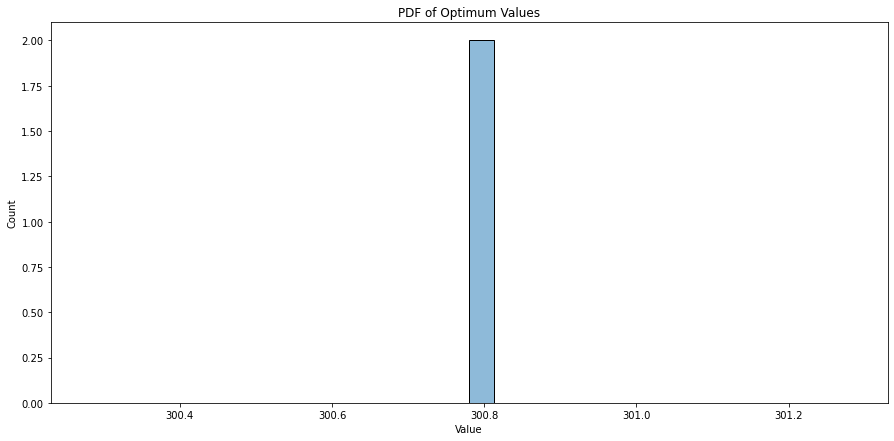

In [153]:
fig, ax = plt.subplots(figsize=(15,7))    
p = sns.histplot(z, bins = 30, kde=True, legend = True,)
ax.set_title('PDF of Optimum Values')
ax.set_xlabel('Value')
ax.set_ylabel('Count')
plt.show()

In [157]:
print(optimizer.max)

{'target': 300.7800911880602, 'params': {'x': 48.30433241509082, 'y': 100.0}}
